In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
analog_file = r"C:\Users\neurogears\Documents\git\neurogears\sarahe-vr-2p\analysis\data\AnalogInput.bin"
fs_analog = 1000 #samples per second
digital_file = r"C:\Users\neurogears\Documents\git\neurogears\sarahe-vr-2p\analysis\data\DigitalInput.bin"
fs_digital = 3000 #samples per second


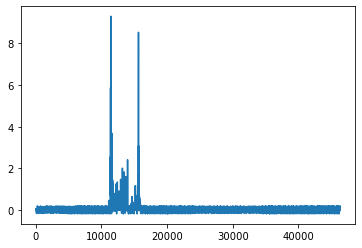

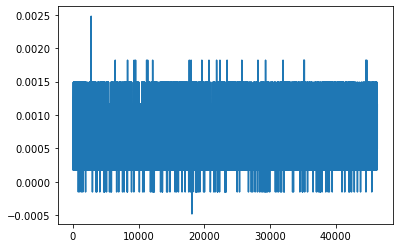

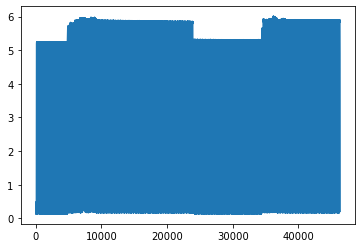

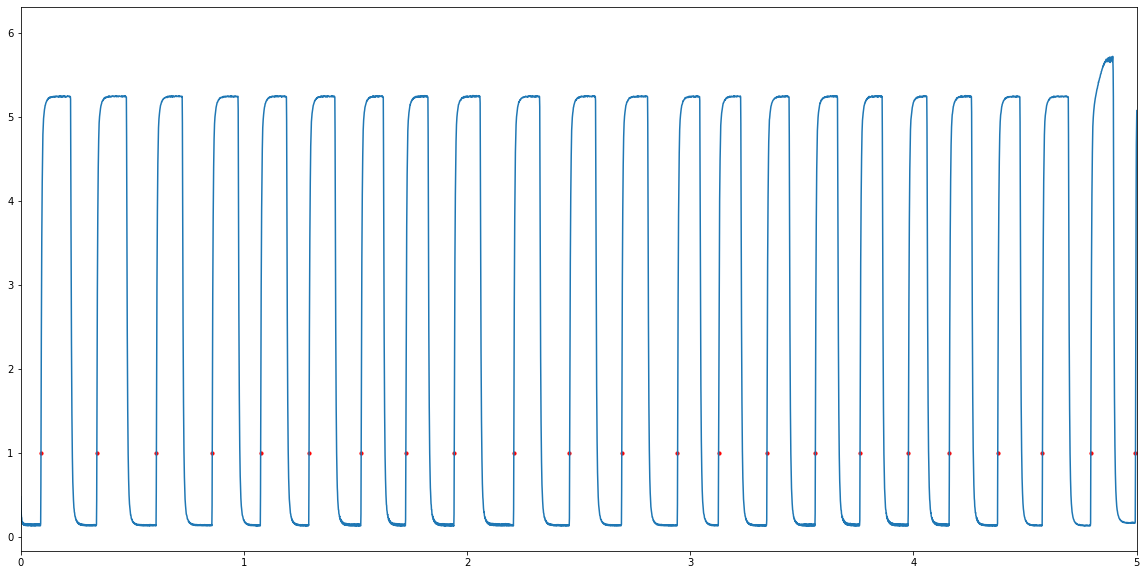

In [21]:
analog_data = np.fromfile(analog_file, dtype=np.float64).reshape(-1,3).transpose()
for i in range(analog_data.shape[0]):
    plt.figure()
    plt.plot(analog_data[i,:])
    plt.show()

analog_photodiode = analog_data[2,:]
photodiode_thresholded = (analog_photodiode > 1).astype(int)
rising_edges = np.where(np.diff(photodiode_thresholded) == 1)[0]


analog_time = np.arange(analog_photodiode.shape[0])/fs_analog
plt.figure(figsize=(20,10))
plt.plot(analog_time, analog_photodiode)
plt.scatter(rising_edges / fs_analog, rising_edges*0 + 1, c='r', s=10)
plt.xlim((0, 5))
plt.show()



In [24]:
def extract_digital_channel(digital_data, channel_number):
     #channel_number goes from 0 to 7
     return digital_data & (1 << channel_number) > 0

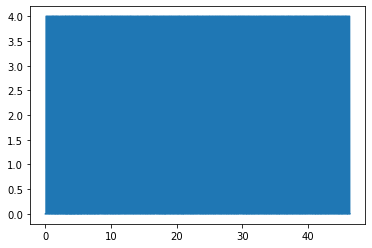

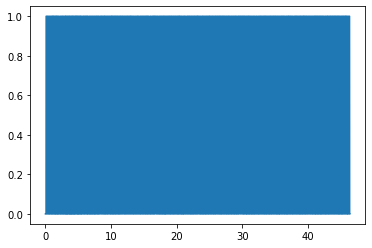

In [29]:
digital_data = np.fromfile(digital_file, dtype=np.byte)
digital_time = np.arange(digital_data.shape[0])/fs_digital


plt.figure()
plt.plot(digital_time, digital_data)

plt.show()

plt.figure()
plt.plot(digital_time, extract_digital_channel(digital_data, 2))
plt.show()


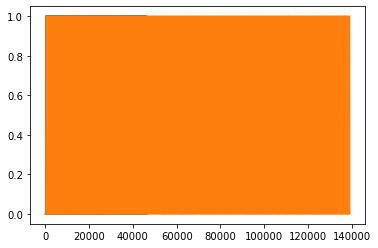

In [30]:
plt.figure()
plt.plot(analog_time, analog_photodiode/5, c = "r")
plt.plot(digital_time, extract_digital_channel(digital_data, 2), c = "b")
plt.show()